# **Importing Tensorflow**

In [1]:
import tensorflow as tf

# **Getting The Dataset From Kaggle**

In [2]:
from google.colab import files

In [3]:
!pip install -q kaggle
#Upload your API key
files.upload()
#Make a folder for your key
!mkdir ~/.kaggle
#Copy the key into that folder
!cp kaggle.json ~/.kaggle/
#And finally allow access to that file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
! kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 95% 219M/230M [00:01<00:00, 145MB/s]
100% 230M/230M [00:01<00:00, 160MB/s]


In [5]:
#Make a directory to hold the set we just downloaded
!mkdir data
#When downloading from kaggle, sets are almost always zipped for efficient transfer, hence the need to unzip the dataset into the data folder
!unzip sarscov2-ctscan-dataset -d data

Archive:  sarscov2-ctscan-dataset.zip
  inflating: data/COVID/Covid (1).png  
  inflating: data/COVID/Covid (10).png  
  inflating: data/COVID/Covid (100).png  
  inflating: data/COVID/Covid (1000).png  
  inflating: data/COVID/Covid (1001).png  
  inflating: data/COVID/Covid (1002).png  
  inflating: data/COVID/Covid (1003).png  
  inflating: data/COVID/Covid (1004).png  
  inflating: data/COVID/Covid (1005).png  
  inflating: data/COVID/Covid (1006).png  
  inflating: data/COVID/Covid (1007).png  
  inflating: data/COVID/Covid (1008).png  
  inflating: data/COVID/Covid (1009).png  
  inflating: data/COVID/Covid (101).png  
  inflating: data/COVID/Covid (1010).png  
  inflating: data/COVID/Covid (1011).png  
  inflating: data/COVID/Covid (1012).png  
  inflating: data/COVID/Covid (1013).png  
  inflating: data/COVID/Covid (1014).png  
  inflating: data/COVID/Covid (1015).png  
  inflating: data/COVID/Covid (1016).png  
  inflating: data/COVID/Covid (1017).png  
  inflating: data/COVID

# **Creating Train, Validation, And Test Directories**

In [6]:
# Importing OS - Used To Navigate Through File Structures
import os

# Importing Shutil: High-Level Interface For File Operations (Copying, Moving, Deleting Files And Directories, And Handling Archives)
import shutil

In [7]:
# Data Directory
base_dir = "/content/data"

# Specifying Paths For Training, Validation, And Test Sets
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"

# Creating The Training, Validation, And Test Directories If They Don't Already Exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Moving Images From The Original Data Directory To The Training, Validation, And Test Directories
# We Are Going Through Each Class, So The Data Is Distributed Equally
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)

    # Calculating The Split Indices
    total_images = len(images)
    train_split = int(0.7 * total_images)
    val_split = int(0.15 * total_images)

    # Moving The Images To Their Respective Directory (Iterating Through Each Image)
    for i, image in enumerate(images):
        src_path = os.path.join(class_path, image)
        # The Image Belongs In The Train Data
        # The Number Of Images In The Train Data Hasn't Reached The Desired Amount
        if i < train_split:
            dst_path = os.path.join(train_dir, class_name)
        # The Image Belongs In The Validation Data
        # The Number Of Images In The Validation Data Hasn't Reached The Desired Amount
        elif i < train_split + val_split:
            dst_path = os.path.join(val_dir, class_name)
        # The Image Belongs In The Test Data
        else:
            dst_path = os.path.join(test_dir, class_name)

        # Checking If The New Path Created Exists Or Not
        # If It Doesn't Exist The Directory Is Created
        if not os.path.exists(dst_path):
            os.makedirs(dst_path) # Directory Made
        shutil.copy(src_path, dst_path) # Files Are Copied To The Destination

# **Data Preprocessing And Augmentation**

In [8]:
# Batch Size
batch_size = 16

# Define The Augmented Transformations For The Training set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # Scales Pixel Values To The Range [0, 1] (Preprocessing)
    shear_range=0.2, # Applies Shear Transformations (Slant The Image Along Its Axis)
    zoom_range=0.2, # Randomly Zooms Into Or Out Of The Image (Zoom Range: 0.2)
    horizontal_flip=True, # Randomly Flips Images Horizontally
    rotation_range=45, # Randomly Rotates The Image By An Angle In The Range [-45, 45] Degrees.
    width_shift_range=0.2, # Shifts The Image Horizontally By A Fraction Of Its Width
    height_shift_range=0.2, # Shifts The Image Vertically By A Fraction Of Its Height
    vertical_flip=True # Randomly Flips Images vertically
)

# No Augmentation Is Needed For The Validation And Test Sets, Only Pixel Value Rescaling [0, 1] (Preprocessing)
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generators For The Training, Validation, And Test Sets
train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

val = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

test = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)


# Class Names
class_names = ['COVID', 'non-COVID']


Found 1736 images belonging to 2 classes.
Found 371 images belonging to 2 classes.
Found 374 images belonging to 2 classes.


# **Plotting The Images**

In [9]:
# Importing Mat Plot Lib For Graphing
import matplotlib.pyplot as plt
import numpy as np

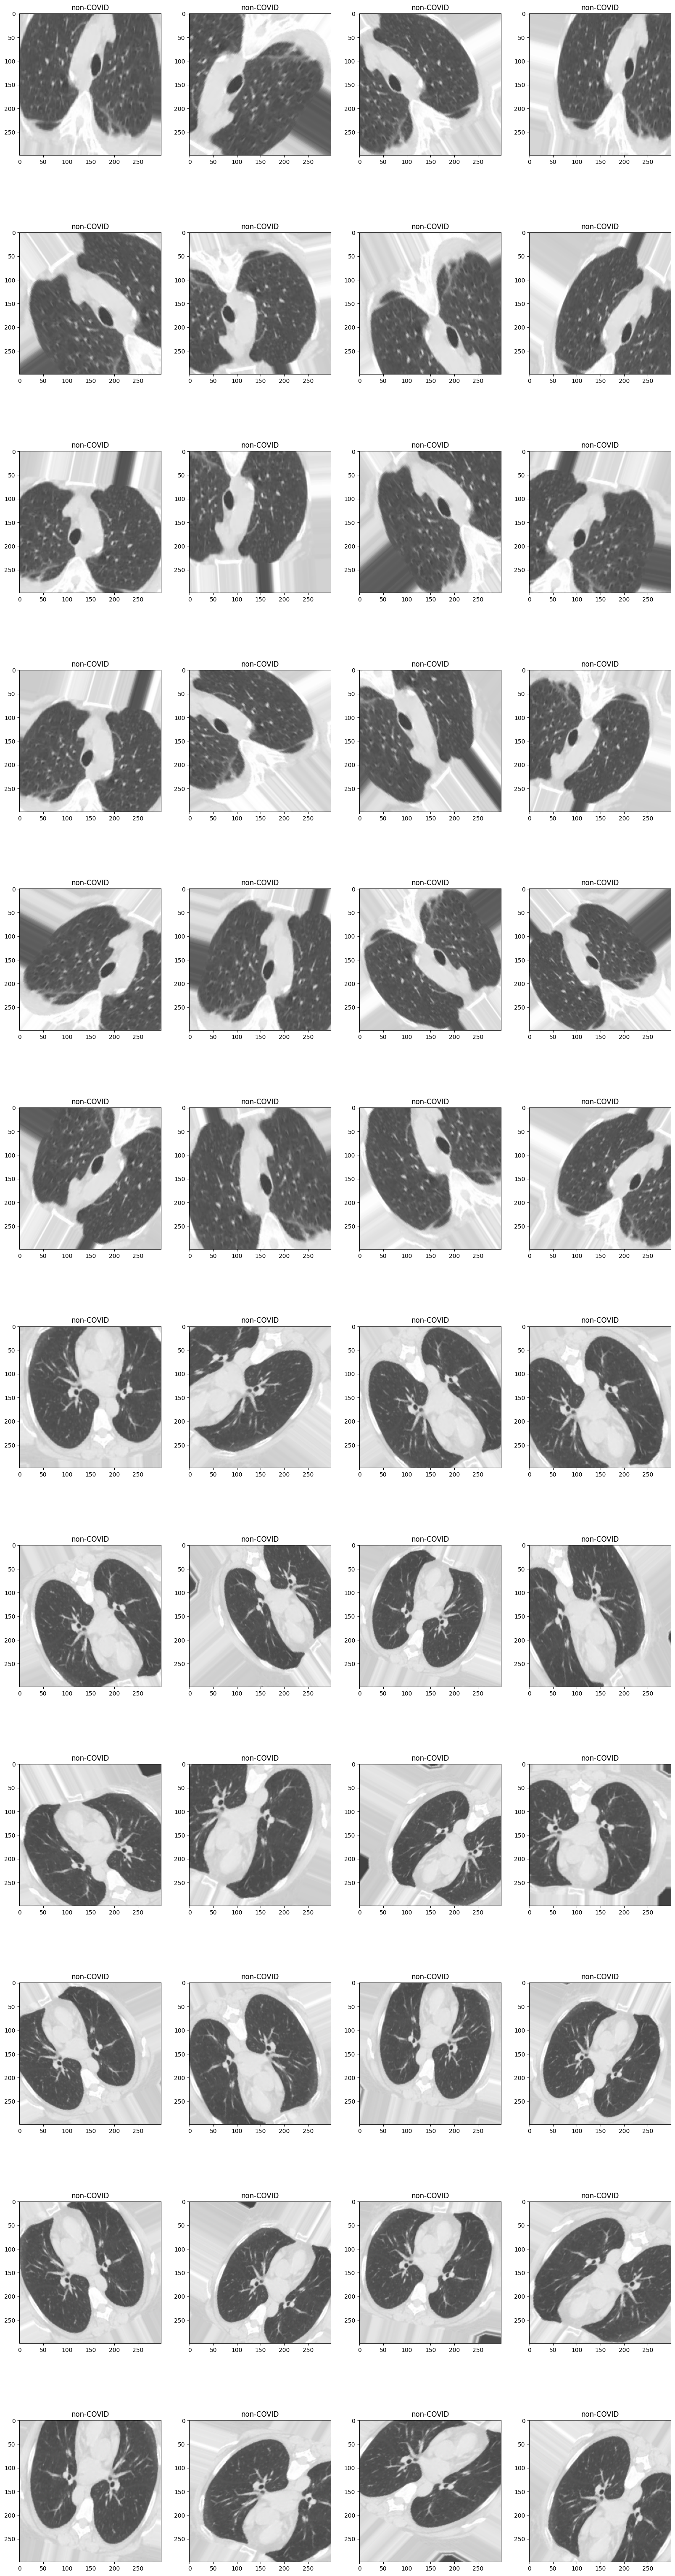

In [10]:
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(12, 4, figsize=(20,80))
    axes = axes.flatten()
    label=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(class_names[np.argmax(labels[label])])
        label=label+1
    plt.show()

# Append A Batch Of Images From Each Category (COVID-19, Normal)
images = [train[34][0][0] for i in range(24)]
images = images + [train[5][0][0] for i in range(24)]

# Append The Batch Of Corresponding Labels
labels = [train[34][1][0] for i in range(24)]
labels=  labels + [train[5][1][0] for i in range(24)]

# Plot Images With Labels
plotImages(images,labels)

# **Initializing The Base Model (Xception) That's Going To Be Used**


In [11]:
input_shape = (299, 299, 3)

In [12]:
from tensorflow.keras.applications import ResNet50, Xception

# Using The Xception Model As The Base Model
# Initializing The Model With Weights Pre-Trained On The ImageNet Dataset
# The Final Fully Connected Layer (Top Layer) Of The Model Is Not Include
# Model For Feature Extraction Rather Than Classification.
baseModel = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

baseModel.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

# **Creating The Model**

In [13]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
# Model With Transfer Learning From Xception
model = models.Sequential()
model.add(baseModel) # Xception
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # Dropout To Reduce Overfitting
model.add(Dense(2, activation='softmax'))  # Final Dense Layer - Can Output Two Classes

# Learning Rate - Determines the size of weight updates during optimization
# Beta_1 - Controls The Contribution Of Past Gradients To The Optimization
# Beta_2 - Controls The Contribution Of Past Squared Gradients To The Optimization
# Epsilon Prevents Division By Zero For Numerical Stability
# Decay - Adjusts Learning Rate Over Time; Set To 0 For No Decay
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Cmpile The Model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True) # Saving The Best Weights
early_stopping = EarlyStopping(patience=5, restore_best_weights=True) # Stopping The Training Early If There Is No Improvement

# Used For Reducing The Learning Rate If The Validation Accuracy Isn't Getting Better But Train Accuracy Is
reduce_lr = ReduceLROnPlateau(factor=0.001, patience=3, min_lr=1e-8)

# **Training**

In [15]:

# Train the model for 30 epochs with the learning rate reduction callback
history = model.fit(
    train,
    epochs=30,
    validation_data=val,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    steps_per_epoch=len(train),
    validation_steps=len(val)
)


Epoch 1/30
109/109 [==============================] - 115s 702ms/step - loss: 0.3915 - accuracy: 0.8059 - val_loss: 0.5674 - val_accuracy: 0.7601 - lr: 1.0000e-04
Epoch 2/30
109/109 [==============================] - 75s 682ms/step - loss: 0.2593 - accuracy: 0.8859 - val_loss: 0.3181 - val_accuracy: 0.8814 - lr: 1.0000e-04
Epoch 3/30
109/109 [==============================] - 72s 662ms/step - loss: 0.1957 - accuracy: 0.9199 - val_loss: 0.5385 - val_accuracy: 0.7898 - lr: 1.0000e-04
Epoch 4/30
109/109 [==============================] - 67s 615ms/step - loss: 0.1537 - accuracy: 0.9441 - val_loss: 0.8366 - val_accuracy: 0.7709 - lr: 1.0000e-04
Epoch 5/30
109/109 [==============================] - 67s 616ms/step - loss: 0.1591 - accuracy: 0.9389 - val_loss: 0.3750 - val_accuracy: 0.8706 - lr: 1.0000e-04
Epoch 6/30
109/109 [==============================] - 70s 642ms/step - loss: 0.1172 - accuracy: 0.9597 - val_loss: 0.1382 - val_accuracy: 0.9542 - lr: 1.0000e-07
Epoch 7/30
109/109 [=======

# **Plot the Training Results**

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

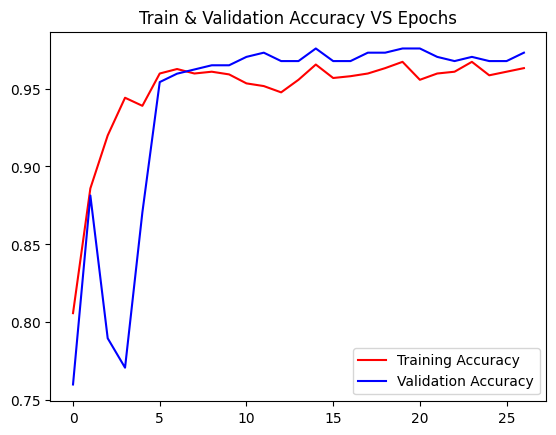

<Figure size 640x480 with 0 Axes>

In [17]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Train & Validation Accuracy VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

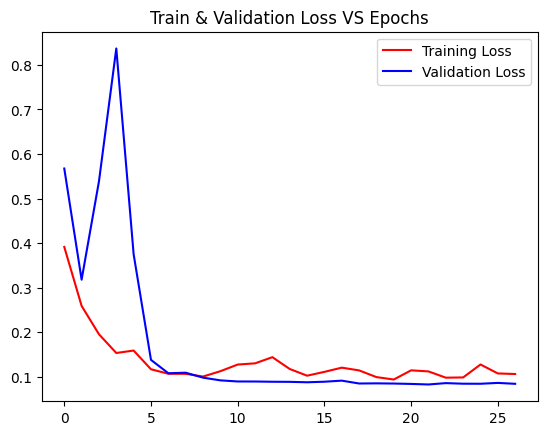

<Figure size 640x480 with 0 Axes>

In [18]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Testing**

In [19]:
model.load_weights("best_model.keras")
score = model.evaluate(test ,verbose=1)

print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

24/24 [==============================] - 5s 221ms/step - loss: 0.0930 - accuracy: 0.9652
Test Loss: 0.09298192709684372
Test accuracy: 96.52406573295593
